# Dataset download
- kaggle APIを使って、直接にデータセットがダウンロードできる。
- kaggleのホームページのアカウントからkaggle.jsonファイルをダウンロードする。
  - https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb#scrollTo=Oqt7Yfi5aQuM
- ダウンロードしたファイルをgoogle colabで使うため、google colabにマウントする。
- 現在のフォルダのpathにファイルダウンロードする。

In [723]:
! pip install kaggle

In [724]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [725]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [726]:
%cd /content/drive/My Drive/Google colab Save/kaggle/titanic

/content/drive/My Drive/Google colab Save/kaggle/titanic


In [727]:
! kaggle competitions download -c titanic

User cancelled operation


In [728]:
!ls

gender_submission.csv  test.csv		      train.csv
submission.csv	       Titanic_problem.ipynb


# Exploratory Data Analysis
- どのようなデータセットであるか、把握することが大事。
- pandas・seabornなどを使って、データの中身を確認する。

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Dictionary from Kaggle
- Survived : 0=No, 1=Yes
- Pclass : 1=1st, 2=2nd, 3=3rd
- Sibsp : # of siblings / spouses aboard the Titanic
- Parch : # of parents / Children aboard the Titanic
- Ticket : Ticket number
- Cabin : Cabin number
- Embarked : C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Non-nullのデータに注目。
必要によって、全部消したり、平均値にreplaceしたりする。

In [ ]:
print(train.shape)
train.isnull().sum()

(891, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
print(test.shape)
test.isnull().sum()

(418, 11)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Graph and Chart for Features
グラフからデータがどのような情報を持っているか、<br>どういう風に扱えばいいかを確認する。

In [ ]:
train[train['Survived']==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train[train['Survived']==0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [ ]:
## Pclassというカテゴリデータを、Survived 0/1 を基準に分けてみると、
temp_s = train[train['Survived']==1]['Pclass'].value_counts()
print(temp_s)

temp_d = train[train['Survived']==0]['Pclass'].value_counts()
print(temp_d)

1    136
3    119
2     87
Name: Pclass, dtype: int64
3    372
2     97
1     80
Name: Pclass, dtype: int64


stacked bar chartを描くには、pandasそのまま使うのが一番簡単だそう…
seabornでは複雑になるらしい。<br> 下のようなplotをいくつか試したいので、funtionを作る

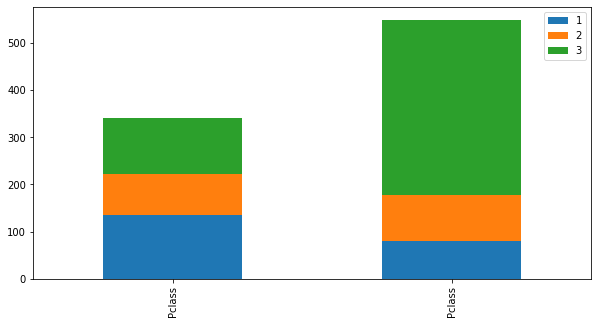

In [ ]:
pd.DataFrame([temp_s,temp_d]).plot(kind='bar', stacked=True, figsize=(10,5))

In [ ]:
def bar_char(feature):
  temp_s = train[train['Survived']==1][feature].value_counts()
  temp_d = train[train['Survived']==0][feature].value_counts()
  df = pd.DataFrame([temp_s, temp_d])
  df.index=['Survuved', 'Dead']
  df.plot(kind='bar',stacked=True,figsize=(10,5))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


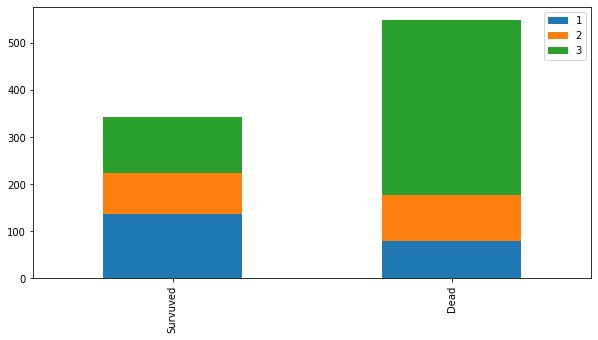

In [ ]:
print(train.columns)
bar_char('Pclass')

Classが3rdである人たちは、Deadになる比率が高い<br>2ndになると半分、1stの場合はSurvivedになった人の割合が高そう。
- PclassというFeatureはそのま使えそう

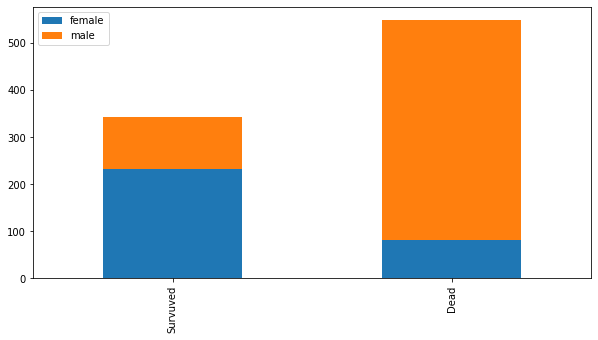

In [ ]:
bar_char('Sex')

男女のSurvived / Deadの割合、大分違うので、良い判断基準になりそう。

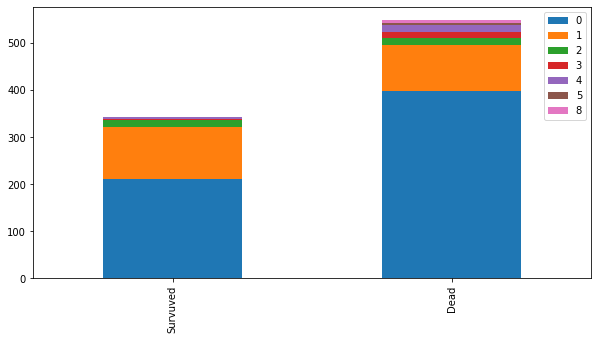

In [ ]:
bar_char('SibSp')

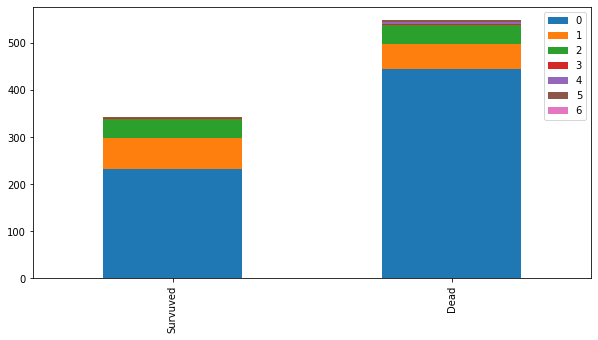

In [ ]:
bar_char('Parch')

0の場合（一人でTitanicに乗った）、他のケース（家族と一緒に乗った）より、Deadの割合が高い。

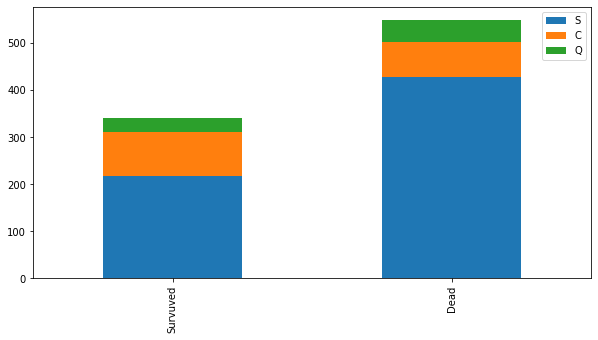

In [ ]:
bar_char('Embarked')

Sの方が気になるが、より詳しい分析が必要

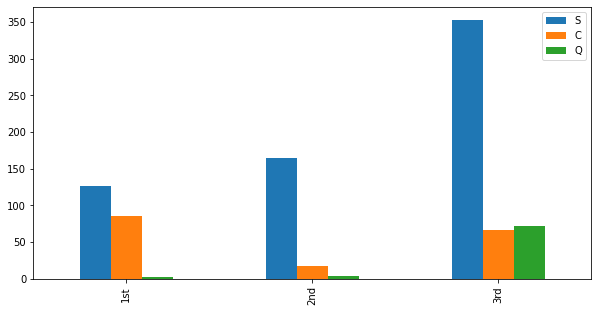

In [ ]:
temp_1 = train[train['Pclass']==1].Embarked.value_counts()
temp_2 = train[train['Pclass']==2].Embarked.value_counts()
temp_3 = train[train['Pclass']==3].Embarked.value_counts()

df = pd.DataFrame([temp_1,temp_2,temp_3])
df.index = ['1st','2nd','3rd']
df.plot(kind='bar',figsize=(10,5))

1st 2nd Classの人たちはQueenstownから乗った確率が低い。

# Feature Engineering
- Machine Learngingで使うデータ　:　vectorの形・Numerical・正規化
- データセットを見ながら、必要であるFeatureは前処理する。

In [ ]:
## List train_test_dataset for doing same pre-processing both of dataset
train_test_dataset = [train, test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Name : Mr. Mrs. Miss. などは情報として使えるかも
- pandas.Series.str
  - str.split : s.str.split('_')
  - str.replace : s.str.replce('_', ' ')
  - str.extract : 
- regular expressionを使って必要な部分だけを取ってくる。

In [ ]:
## for testing
temp = train
temp.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [ ]:
for data_set in train_test_dataset:
  data_set['P_title'] = data_set['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
train.P_title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Capt          1
Jonkheer      1
Lady          1
Mme           1
Countess      1
Don           1
Sir           1
Ms            1
Name: P_title, dtype: int64

In [ ]:
temp = train.P_title.value_counts().index.tolist()[4:]
title_mapping = {'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3}
for t in temp :
  title_mapping[t] = 4
title_mapping

{'Capt': 4,
 'Col': 4,
 'Countess': 4,
 'Don': 4,
 'Dr': 4,
 'Jonkheer': 4,
 'Lady': 4,
 'Major': 4,
 'Master': 3,
 'Miss': 1,
 'Mlle': 4,
 'Mme': 4,
 'Mr': 0,
 'Mrs': 2,
 'Ms': 4,
 'Rev': 4,
 'Sir': 4}

In [ ]:
for data_set in train_test_dataset:
  data_set['title'] = data_set['P_title'].map(title_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,P_title,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [ ]:
train = train.drop(['Name','P_title'],axis=1)
test = test.drop(['Name','P_title'],axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


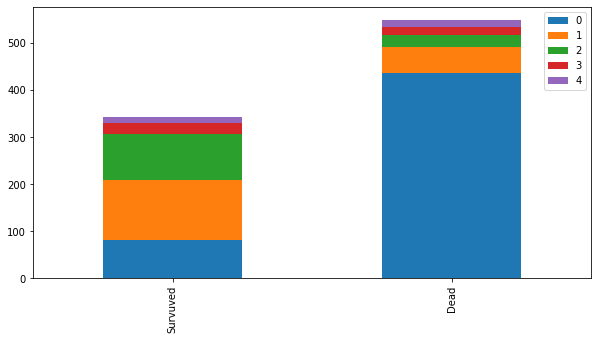

In [ ]:
bar_char('title')

Sex : male=0, fefale=1

In [ ]:
sex_mapping = {'male':0, 'female':1}
train['Sex'] = train['Sex'].map(sex_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
test['Sex'] = test['Sex'].map(sex_mapping)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2.0


Age : Null valueがあったので、処理しなければならない。
- 全てのデータから平均（medianとか）を取ることもできるが、
- Nameから求めたTitleに分けて、missing valueを埋めよう。

In [ ]:
train.Age.isnull().sum()

177

In [ ]:
train['Age'].fillna(train.groupby('title')['Age'].transform('median'),inplace=True)
test['Age'].fillna(test.groupby('title')['Age'].transform('median'),inplace=True)
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


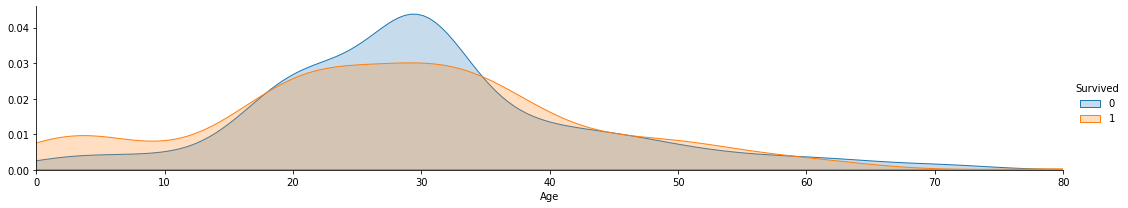

In [ ]:
facet = sns.FacetGrid(train, hue='Survived',aspect=5)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

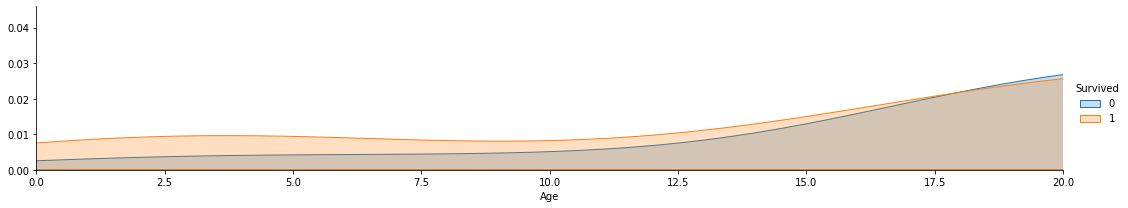

In [ ]:
facet = sns.FacetGrid(train, hue='Survived',aspect=5)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

(20.0, 40.0)

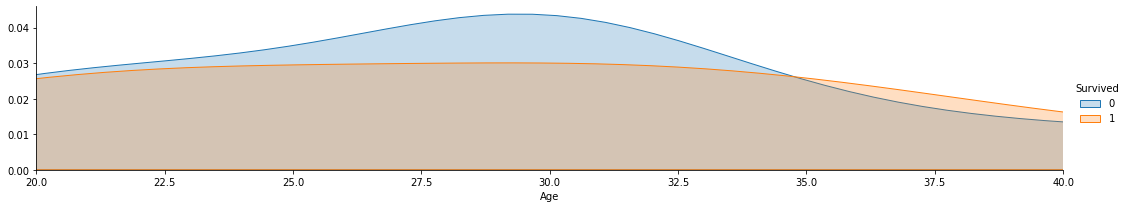

In [ ]:
facet = sns.FacetGrid(train, hue='Survived',aspect=5)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20,40)

(40.0, 60.0)

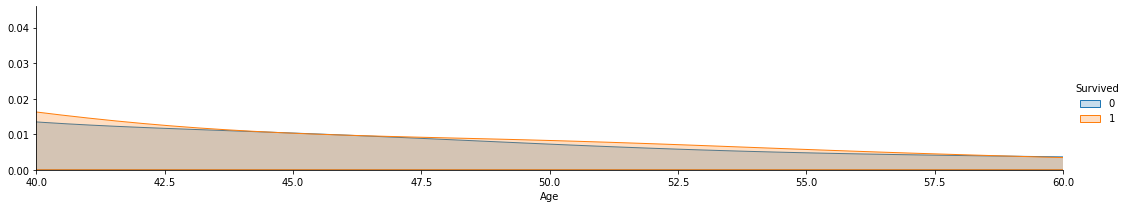

In [ ]:
facet = sns.FacetGrid(train, hue='Survived',aspect=5)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40,60)

(60.0, 80.0)

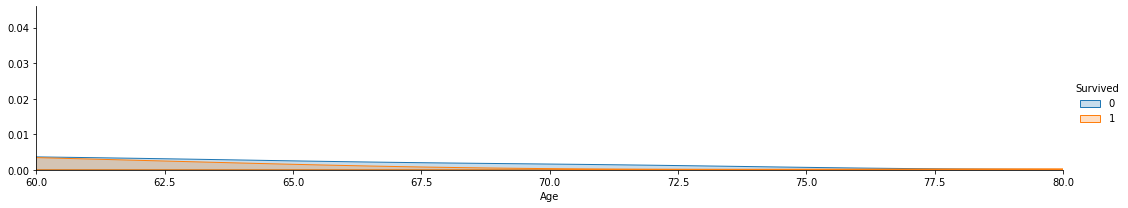

In [ ]:
facet = sns.FacetGrid(train, hue='Survived',aspect=5)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60,80)

Bining : Convert Numerical Age to Categorical variable<br>
上の分析から、16歳以下の人のSurvived割合・30代の人のDead割合が目立つ。

Category to :
- child : 0
- young : 1
- adult : 2
- mid-age : 3
- senior : 4

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
def age_categorical(dataset):
  dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
  dataset.loc[dataset['Age'] > 62, 'Age'] = 4
  return dataset

In [ ]:
age_categorical(train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,13.0000,NaN,S,4
887,888,1,1,1,1.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,1,1.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,0,1.0,0,0,111369,30.0000,C148,C,0


In [ ]:
age_categorical(test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,0,3.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0,0,A.5. 3236,8.0500,NaN,S,0.0
414,1306,1,1,3.0,0,0,PC 17758,108.9000,C105,C,NaN
415,1307,3,0,3.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.0
416,1308,3,0,2.0,0,0,359309,8.0500,NaN,S,0.0


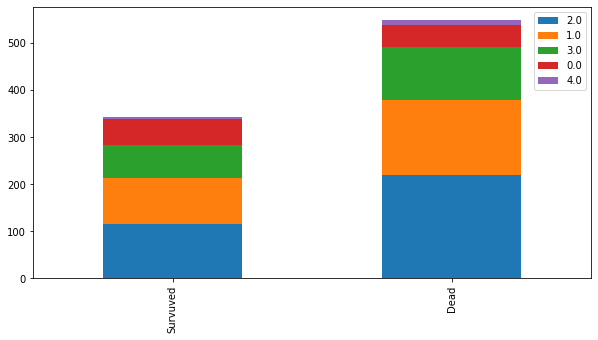

In [ ]:
bar_char('Age')

Embarked : missing valueがある。<br>train setの二つのsample、dropnaしても大丈夫そうだか、
推測できそうなら、使いたい。<br>
Sにすれば、大丈夫かな…

In [ ]:
train.Embarked.isnull().sum()

2

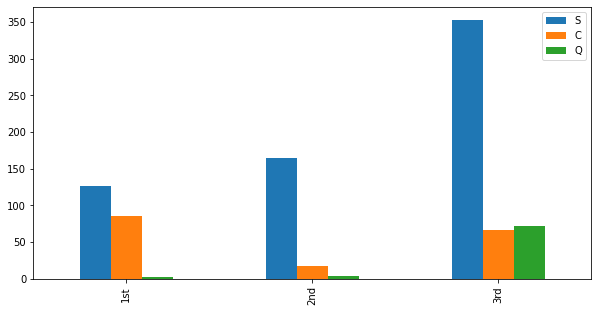

In [ ]:
temp_1 = train[train['Pclass']==1].Embarked.value_counts()
temp_2 = train[train['Pclass']==2].Embarked.value_counts()
temp_3 = train[train['Pclass']==3].Embarked.value_counts()

df = pd.DataFrame([temp_1,temp_2,temp_3])
df.index = ['1st','2nd','3rd']
df.plot(kind='bar',figsize=(10,5))

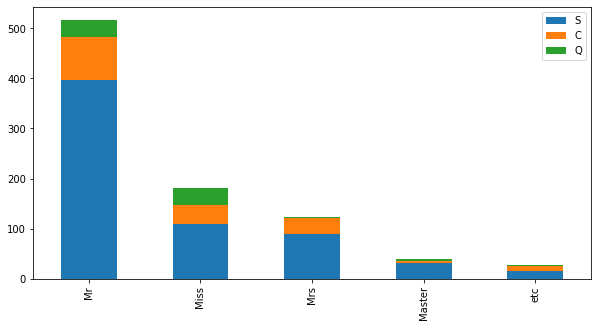

In [ ]:
temp_1 = train[train['title']==0].Embarked.value_counts()
temp_2 = train[train['title']==1].Embarked.value_counts()
temp_3 = train[train['title']==2].Embarked.value_counts()
temp_4 = train[train['title']==3].Embarked.value_counts()
temp_5 = train[train['title']==4].Embarked.value_counts()

df = pd.DataFrame([temp_1,temp_2,temp_3,temp_4,temp_5])
df.index = ['Mr','Miss','Mrs','Master','etc']
df.plot(kind='bar',figsize=(10,5),stacked=True)

In [ ]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
61,62,1,1,1,3.0,0,0,113572,80.0,B28,NaN,1
829,830,1,1,1,3.0,0,0,113572,80.0,B28,NaN,2


In [ ]:
train.Embarked = train.Embarked.fillna('S')
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
title            0
dtype: int64

In [ ]:
test.loc[test.title.isnull(),'title'] = 4

In [ ]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
embark_mapping = {'S':0, 'C':1, 'Q':2}
train.Embarked = train.Embarked.map(embark_mapping)
test.Embarked = test.Embarked.map(embark_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


Fare : There is a null value in Fare feature of test_set, fill the missing value with median fare for each Pclass<br>
- groupby.transformを使って、練習してみましょう。
- categorical 練習もしてみましょう。

In [ ]:
print(train.Fare.isnull().sum())
print(test.Fare.isnull().sum())

0
1


In [ ]:
train.groupby('Pclass')['Fare'].transform('median')

0       8.0500
1      60.2875
2       8.0500
3      60.2875
4       8.0500
        ...   
886    14.2500
887    60.2875
888     8.0500
889    60.2875
890     8.0500
Name: Fare, Length: 891, dtype: float64

In [ ]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)
print(train.Fare.isnull().sum())
print(test.Fare.isnull().sum())

0
0


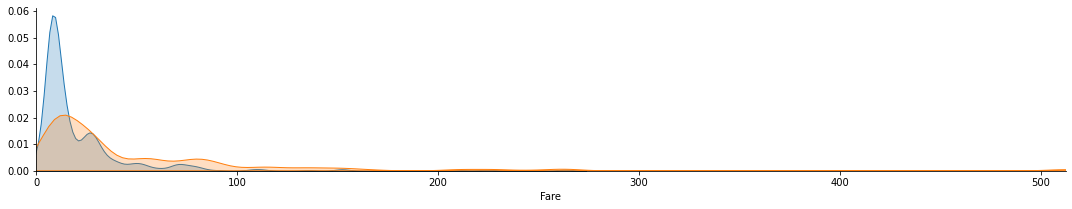

In [ ]:
facet = sns.FacetGrid(train, hue='Survived',aspect=5)
facet.map(sns.kdeplot, 'Fare', shade=True, bw_adjust=.4)
facet.set(xlim=(0,train.Fare.max()))
plt.show()

(0.0, 20.0)

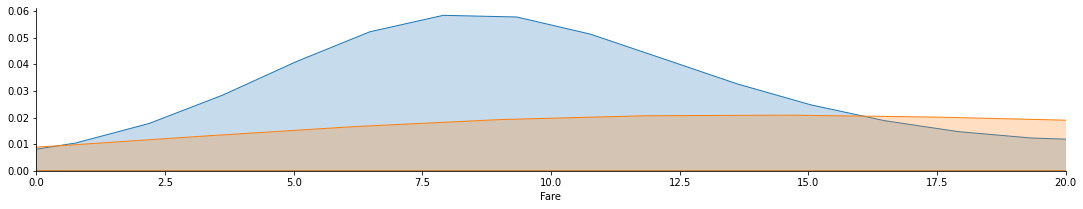

In [ ]:
facet = sns.FacetGrid(train, hue='Survived',aspect=5)
facet.map(sns.kdeplot, 'Fare', shade=True, bw_adjust=.4)
facet.set(xlim=(0,train.Fare.max()))
plt.xlim(0,20)

(15.0, 40.0)

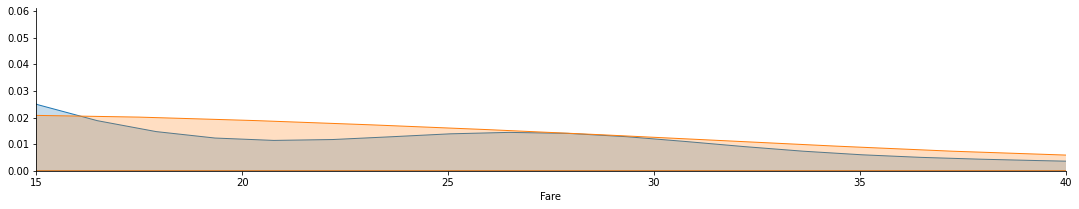

In [ ]:
facet = sns.FacetGrid(train, hue='Survived',aspect=5)
facet.map(sns.kdeplot, 'Fare', shade=True, bw_adjust=.4)
facet.set(xlim=(0,train.Fare.max()))
plt.xlim(15,40)

(30.0, 100.0)

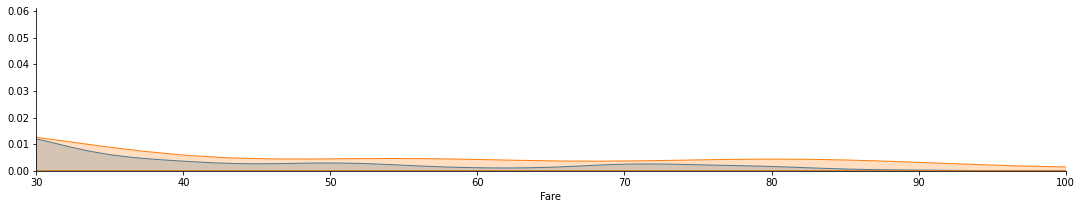

In [ ]:
facet = sns.FacetGrid(train, hue='Survived',aspect=5)
facet.map(sns.kdeplot, 'Fare', shade=True, bw_adjust=.4)
facet.set(xlim=(0,train.Fare.max()))
plt.xlim(30,100)

(100.0, 500.0)

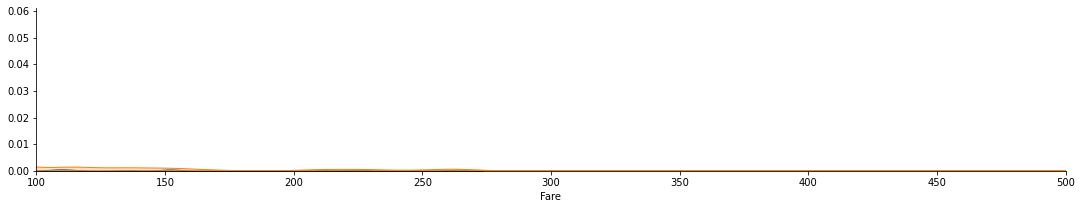

In [ ]:
facet = sns.FacetGrid(train, hue='Survived',aspect=5)
facet.map(sns.kdeplot, 'Fare', shade=True, bw_adjust=.4)
facet.set(xlim=(0,train.Fare.max()))
plt.xlim(100,500)

make categorical feature from Fare information:
- ~17
- 17~30
- 30~100
- 100~

In [ ]:
def fare_categorical(dataset):
  dataset.loc[dataset['Fare']<=17, 'Fare'] = 0
  dataset.loc[(dataset['Fare']>17) & (dataset['Fare']<=30), 'Fare'] = 1
  dataset.loc[(dataset['Fare']>30) & (dataset['Fare']<=100), 'Fare'] = 2
  dataset.loc[dataset['Fare']>100, 'Fare'] = 3

In [ ]:
fare_categorical(train)
fare_categorical(test)
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,E46,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,2.0,NaN,1,2


Cabin : there are many null values
- valueを持っているデータを分析し
- 相応しい数値で埋める
- Pclassと関係性を持っていると考えて…

In [ ]:
train.Cabin.isnull().sum()

687

In [ ]:
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
E101           3
              ..
E10            1
T              1
C62 C64        1
F E69          1
E46            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
train.Cabin = train.Cabin.str[:1]
test.Cabin = test.Cabin.str[:1]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


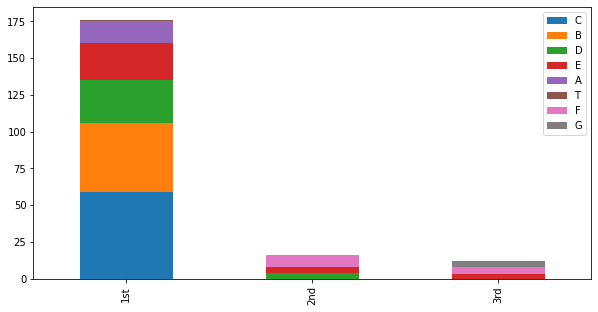

In [ ]:
temp_1 = train[train.Pclass==1].Cabin.value_counts()
temp_2 = train[train.Pclass==2].Cabin.value_counts()
temp_3 = train[train.Pclass==3].Cabin.value_counts()

df = pd.DataFrame([temp_1,temp_2,temp_3])
df.index = ['1st','2nd','3rd']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [ ]:
cabin_mapping = {'T':0, 'A':0.5, 'B':0.5, 'C':0.5, 'D':1, 'E':1.5, 'F':1.5, 'G':3}
train.Cabin = train.Cabin.map(cabin_mapping)
test.Cabin = test.Cabin.map(cabin_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.5,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.5,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [ ]:
train.Cabin.fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test.Cabin.fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,1.5,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.5,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,1.5,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.5,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,1.5,0,0


FamilySize
- 家族がいるかいないか

In [ ]:
train['FamilySize'] = train.SibSp + train.Parch
test['FamilySize'] = test.SibSp + test.Parch
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,1.5,0,0,1
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.5,1,2,1
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,1.5,0,1,0
3,4,1,1,1,2.0,1,0,113803,2.0,0.5,0,2,1
4,5,0,3,0,2.0,0,0,373450,0.0,1.5,0,0,0


In [ ]:
train = train.drop(['SibSp','Parch'],axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,title,FamilySize
0,1,0,3,0,1.0,A/5 21171,0.0,1.5,0,0,1
1,2,1,1,1,3.0,PC 17599,2.0,0.5,1,2,1
2,3,1,3,1,1.0,STON/O2. 3101282,0.0,1.5,0,1,0
3,4,1,1,1,2.0,113803,2.0,0.5,0,2,1
4,5,0,3,0,2.0,373450,0.0,1.5,0,0,0


In [ ]:
test = test.drop(['SibSp','Parch'],axis=1)

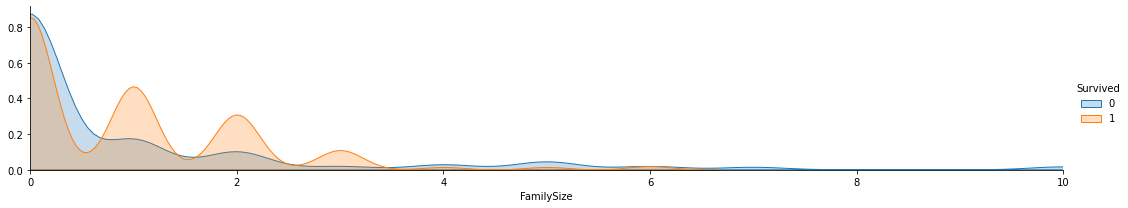

In [ ]:
facet = sns.FacetGrid(train, hue='Survived', aspect=5)
facet.map(sns.kdeplot, 'FamilySize', shade=True, bw_adjust=.6)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()

plt.show()

In [ ]:
family_mapping = {0:1, 1:3, 2:3, 3:3, 4:2, 5:2, 6:2, 7:2, 8:2, 9:2, 10:2, 11:2}
train.FamilySize = train.FamilySize.map(family_mapping)
test.FamilySize = test.FamilySize.map(family_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,title,FamilySize
0,1,0,3,0,1.0,A/5 21171,0.0,1.5,0,0,3
1,2,1,1,1,3.0,PC 17599,2.0,0.5,1,2,3
2,3,1,3,1,1.0,STON/O2. 3101282,0.0,1.5,0,1,1
3,4,1,1,1,2.0,113803,2.0,0.5,0,2,3
4,5,0,3,0,2.0,373450,0.0,1.5,0,0,1


In [ ]:
train_data = train.drop('Ticket',axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title,FamilySize
0,1,0,3,0,1.0,0.0,1.5,0,0,3
1,2,1,1,1,3.0,2.0,0.5,1,2,3
2,3,1,3,1,1.0,0.0,1.5,0,1,1
3,4,1,1,1,2.0,2.0,0.5,0,2,3
4,5,0,3,0,2.0,0.0,1.5,0,0,1


In [ ]:
test_data = test.drop('Ticket',axis=1)
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,title,FamilySize
0,892,3,0,2.0,0.0,1.5,2,0.0,1
1,893,3,1,3.0,0.0,1.5,0,2.0,3
2,894,2,0,3.0,0.0,1.5,2,0.0,1
3,895,3,0,2.0,0.0,1.5,0,0.0,1
4,896,3,1,1.0,0.0,1.5,0,2.0,3


In [ ]:
train_data = train_data.drop('PassengerId',axis=1)
test_data = test_data.drop('PassengerId',axis=1)

In [ ]:
target = train_data.Survived
train_data = train_data.drop('Survived',axis=1)

## Modelling
基本的な方法として
- kNN : 周りのk個の結果を参考し、あるsampleの結果を判断する。
- DicisionTree 
- RandomForest：複数のDicisionTree
- GaussianNB：確率的なアクセス
- SVC：Support Vectorsを基準で、グループを分ける

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np

### K-fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state=0)

### kNN

In [ ]:
clf = KNeighborsClassifier(n_neighbors=10)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.83146067 0.80898876 0.76404494 0.85393258 0.82022472
 0.82022472 0.85393258 0.83146067 0.82022472]


In [ ]:
round(np.mean(score)*100,2)

82.16

### Decision Tree

In [ ]:
clf = DecisionTreeClassifier()
scoring='accuracy'
score = cross_val_score(clf, train_data, target, cv=10, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.83146067 0.69662921 0.85393258 0.84269663 0.80898876
 0.80898876 0.75280899 0.85393258 0.84269663]


In [ ]:
round(np.mean(score*100),2)

80.59

### RandomForest

In [ ]:
clf = RandomForestClassifier(n_estimators=10)
score = cross_val_score(clf, train_data, target, cv=13, scoring='accuracy')
print(score)

[0.76811594 0.82608696 0.72463768 0.75362319 0.82608696 0.86956522
 0.82608696 0.82352941 0.80882353 0.79411765 0.83823529 0.83823529
 0.88235294]


In [ ]:
round(np.mean(score)*100,2)

81.38

### naive Bayes

In [ ]:
clf = GaussianNB()
score = cross_val_score(clf, train_data, target, cv=10, scoring='accuracy')
print(score)

[0.68888889 0.71910112 0.74157303 0.74157303 0.78651685 0.76404494
 0.7752809  0.75280899 0.78651685 0.78651685]


In [ ]:
round(np.mean(score)*100,2)

75.43

### SVM

In [ ]:
clf = SVC()
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)

[0.83333333 0.80898876 0.80898876 0.80898876 0.84269663 0.82022472
 0.83146067 0.85393258 0.83146067 0.84269663]


In [ ]:
round(np.mean(score)*100,2)

82.83

## Testing

In [ ]:
test_data = test.drop('PassengerId',axis=1)

In [ ]:
test_data = test_data.drop('Ticket',axis=1)

In [ ]:
clf = SVC()
clf.fit(train_data, target)

prediction = clf.predict(test_data)

### save submission file and submit using kaggle API

In [ ]:
submission = pd.DataFrame({
    'PassengerId':test.PassengerId,
    'Survived':prediction
})

submission.to_csv('submission.csv',index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
!kaggle competitions submit -c titanic -f submission.csv -m "Submission Test_2"

100% 2.77k/2.77k [00:00<00:00, 13.1kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [ ]:
pd.read_csv('submission.csv')

,Unnamed: 0,PassengerId,Survived
0,0,892,0
1,1,893,0
2,2,894,0
3,3,895,0
4,4,896,1
...,...,...,...
413,413,1305,0
414,414,1306,1
415,415,1307,0
416,416,1308,0
